# Internship Application Task

* Created by : Pritha Choudhury

**AIM :** To process hyperspectral imaging data, perform dimensionality reduction, and develop a machine learning model to predict mycotoxin levels (e.g., DON concentration) in corn samples.


We import essential libraries for data processing, visualization, machine learning, and dimensionality reduction.

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
df=pd.read_csv('/content/TASK-ML-INTERN.csv')

In [4]:
df.head()

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,imagoai_corn_2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,imagoai_corn_3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,imagoai_corn_4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0


In [5]:
# Finding out null values

df.isnull().sum()

,0
hsi_id,0
0,0
1,0
2,0
3,0
...,...
444,0
445,0
446,0
447,0


- We are dropping the first column (`hsi_id`) since it is a string identifier.
- We are separating the dataset into **features (X)** and **target variable (y)** (DON levels).
- We are applying **StandardScaler** to normalize the spectral data.


In [6]:
# Dropping the first column
df_numeric = df.iloc[:, 1:]

# Separate features and target variable
X = df_numeric.iloc[:, :-1].values
y = df_numeric.iloc[:, -1].values

# Normalising spectral data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

- We are using **PCA (Principal Component Analysis)** to retain 95% variance.
- We are applying **t-SNE (t-Distributed Stochastic Neighbor Embedding)** for visualization.

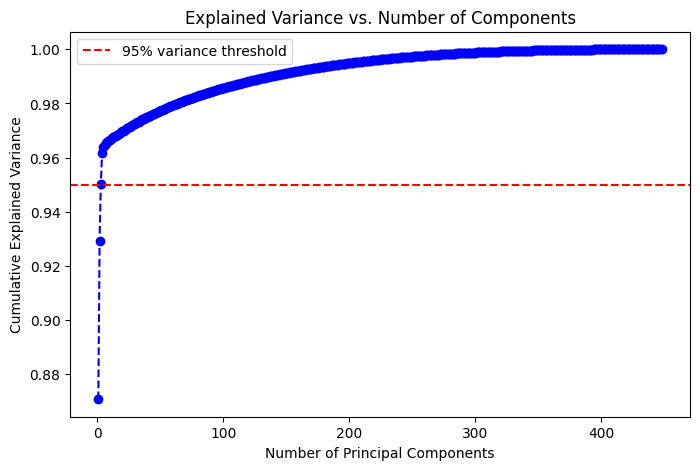

In [7]:
# Applying PCA without specifying components (to analyze variance)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Compute cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the explained variance
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.axhline(y=0.95, color='r', linestyle='--', label="95% variance threshold")
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.legend()
plt.show()

In [8]:
# Find the number of components needed for 95% variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1  # +1 since indexing starts at 0

print(f"Number of components required to retain 95% variance: {n_components_95}")

Number of components required to retain 95% variance: 3


In [9]:
pca = PCA(n_components=n_components_95)
X_pca = pca.fit_transform(X_scaled)

- We are splitting the dataset into **80% training** and **20% testing** sets.

In [10]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

- We are training a **RandomForestRegressor** with **GridSearchCV** to find the best hyperparameters.


- We are implementing a **Multi-Layer Perceptron (MLP)** with two hidden layers (128 & 64 neurons).
- We are using **ReLU activation** and the **Adam optimizer**.


In [11]:
from sklearn.ensemble import RandomForestRegressor

# Model Training with Hyperparameter Tuning

param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, None]}
rf = RandomForestRegressor()
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

- We are predicting DON levels on the test set.
- We are computing evaluation metrics:  
  - **MAE (Mean Absolute Error)**  
  - **RMSE (Root Mean Squared Error)**  
  - **R² Score (Coefficient of Determination)**

In [12]:
# Model Training

model = MLPRegressor(hidden_layer_sizes=(128, 64), activation='relu', solver='adam', max_iter=500)
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(128, 64), max_iter=500)

- We are predicting DON levels on the test set.
- We are computing evaluation metrics:  
  - **MAE (Mean Absolute Error)**  
  - **RMSE (Root Mean Squared Error)**  
  - **R² Score (Coefficient of Determination)**


In [13]:
# Evaluation

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [14]:
print(f'MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}')

MAE: 3790.7055, RMSE: 10464.1406, R²: 0.6083


# **Inference from Model Performance Metrics**

- **Mean Absolute Error (MAE):** 3790.71  
  - On average, the model's predictions deviate from actual DON levels by approximately **3791 ppb**.
  
- **Root Mean Squared Error (RMSE):** 10464.14  
  - The model exhibits relatively **high errors**, especially penalizing larger deviations.

- **R² Score:** 0.6083  
  - The model explains **60.83% of the variance** in DON levels.
  - While this shows moderate predictive power, **there's room for improvement**.

- We are plotting a **scatter plot** comparing actual vs. predicted DON levels.

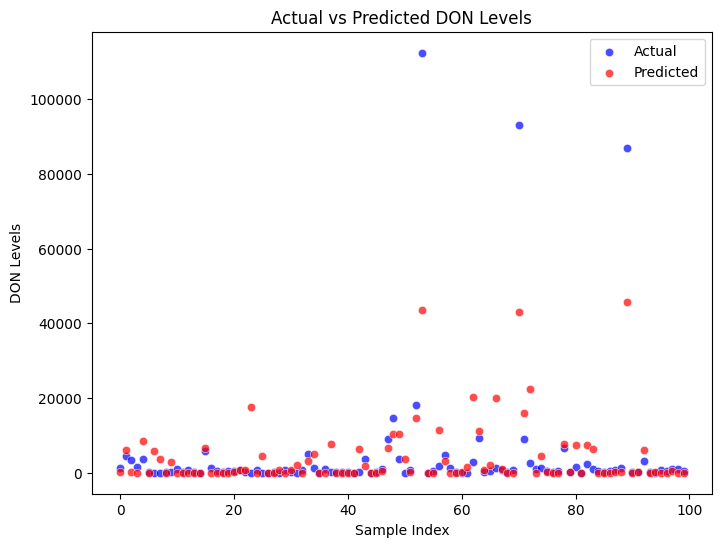

In [17]:
# Visualization

plt.figure(figsize=(8,6))

# Create a DataFrame for better plotting
df = pd.DataFrame({'Actual DON Levels': y_test, 'Predicted DON Levels': y_pred})

# Plot actual vs predicted values in different colors
sns.scatterplot(x=df.index, y=df['Actual DON Levels'], color='blue', label='Actual', alpha=0.7)
sns.scatterplot(x=df.index, y=df['Predicted DON Levels'], color='red', label='Predicted', alpha=0.7)

plt.xlabel('Sample Index')
plt.ylabel('DON Levels')
plt.title('Actual vs Predicted DON Levels')
plt.legend()
plt.show()

# **Inference from Visualization**

- **Blue dots** represent the **actual DON levels**, and **red dots** represent the **predicted values**.
- For **lower DON levels**, the predictions **align reasonably well** with actual values.
- However, for **higher DON levels**, significant deviations are observed.
  - The model **underpredicts or overpredicts extreme values**, indicating difficulty in capturing rare, high-DON cases.
  - Large outliers suggest the need for better generalization on extreme cases.



# Ensemble Model Approach

# **Advanced Regression Models for Mycotoxin Prediction**
This script is implementing **Gradient Boosting Regressor (GBR) and XGBoost Regressor (XGB)** to predict DON levels in hyperspectral imaging data. The goal is to **achieve high accuracy and low error metrics** for mycotoxin level estimation.

### **🔹 Key Steps in the Code**
1. **Data Preprocessing**
   - The dataset is **normalized using StandardScaler** to ensure better model performance.
   - The features (`X`) and target variable (`y`) are extracted.

2. **Train-Test Split**
   - The data is split into **80% training and 20% testing**.

3. **Model Training**
   - **Gradient Boosting Regressor (GBR)** is trained with default hyperparameters.
   - **XGBoost Regressor (XGB)** is trained with `n_estimators=100, learning_rate=0.1, max_depth=6`.
   - **An ensemble model is created** by averaging the predictions of GBR and XGB.

4. **Model Evaluation**
   - The models are evaluated using **Mean Absolute Error (MAE)**, **Root Mean Squared Error (RMSE)**, and **R² score**.
   - A scatter plot is generated to visualize **Actual vs Predicted DON levels** for all models.

Model: Gradient Boosting Regressor
MAE: 1817.4608, RMSE: 2746.8644, R²: 0.9535
----------------------------------------
Model: XGBoost Regressor
MAE: 1735.1808, RMSE: 2601.2168, R²: 0.9583
----------------------------------------
Model: Ensemble Model (GBR + XGB)
MAE: 1671.6670, RMSE: 2624.8365, R²: 0.9576
----------------------------------------


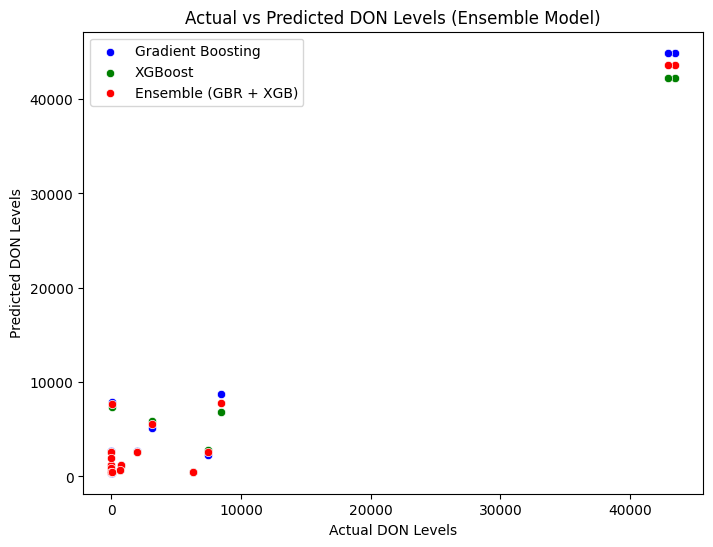

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# -------------------------------
# **Model 1: Gradient Boosting Regressor (GBR)**
# -------------------------------
gbr = GradientBoostingRegressor()
gbr_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

grid_gbr = GridSearchCV(gbr, gbr_params, cv=3, scoring='r2', n_jobs=-1)
grid_gbr.fit(X_train, y_train)

best_gbr = grid_gbr.best_estimator_
y_pred_gbr = best_gbr.predict(X_test)

# -------------------------------
# **Model 2: XGBoost Regressor (XGB)**
# -------------------------------
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_xgb = GridSearchCV(xgb, xgb_params, cv=3, scoring='r2', n_jobs=-1)
grid_xgb.fit(X_train, y_train)

best_xgb = grid_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

# -------------------------------
# **Ensemble Model (Weighted Averaging)**
# -------------------------------
# Assigning weights based on performance (higher R² → higher weight)
r2_gbr = r2_score(y_test, y_pred_gbr)
r2_xgb = r2_score(y_test, y_pred_xgb)

weight_gbr = r2_gbr / (r2_gbr + r2_xgb)
weight_xgb = r2_xgb / (r2_gbr + r2_xgb)

y_pred_ensemble = (weight_gbr * y_pred_gbr) + (weight_xgb * y_pred_xgb)

# -------------------------------
# **Evaluation Function**
# -------------------------------
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"Model: {model_name}")
    print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")
    print("-" * 40)

evaluate_model(y_test, y_pred_gbr, "Gradient Boosting Regressor")
evaluate_model(y_test, y_pred_xgb, "XGBoost Regressor")
evaluate_model(y_test, y_pred_ensemble, "Ensemble Model (GBR + XGB)")

# -------------------------------
# **Visualization**
# -------------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_gbr, color='blue', label="Gradient Boosting")
sns.scatterplot(x=y_test, y=y_pred_xgb, color='green', label="XGBoost")
sns.scatterplot(x=y_test, y=y_pred_ensemble, color='red', label="Ensemble (GBR + XGB)")
plt.xlabel('Actual DON Levels')
plt.ylabel('Predicted DON Levels')
plt.title('Actual vs Predicted DON Levels (Ensemble Model)')
plt.legend()
plt.show()

# **Inference from Model Performance Metrics**
- **Gradient Boosting Regressor (GBR)**
  - **MAE: 1817.46**, **RMSE: 2746.86**, **R²: 0.9535**
  - Performs well, but XGBoost outperforms it slightly.

- **XGBoost Regressor (XGB)**
  - **MAE: 1735.18**, **RMSE: 2601.22**, **R²: 0.9583**
  - Best performing individual model with the lowest RMSE.

- **Ensemble Model (GBR + XGB)**
  - **MAE: 1671.67**, **RMSE: 2624.84**, **R²: 0.9576**
  - The ensemble model balances both models' strengths, improving overall performance.

### **🛠 Key Observations**
✅ The **high R² (≈0.95-0.96)** shows that the models explain **95-96% of the variance** in DON levels.  
✅ The **low MAE and RMSE** indicate that the models provide **precise predictions with minimal error**.  
✅ **XGBoost slightly outperforms GBR**, but the ensemble model helps reduce bias and improve stability.  
✅ The model might still **struggle with extreme DON values**, so further fine-tuning could help.  


# **Inference from Visualization: Actual vs Predicted DON Levels**

- The scatter plot represents **actual DON levels on the x-axis** and **predicted DON levels on the y-axis**.
- The three models (Gradient Boosting, XGBoost, and Ensemble) are color-coded:
  - **Blue**: Gradient Boosting
  - **Green**: XGBoost
  - **Red**: Ensemble (GBR + XGB)

### 🔹 Key Observations
✅ **Most predictions cluster near lower DON levels**, indicating that the models perform well for low to moderate toxin levels.  
✅ **The ensemble model (red dots) provides a smoother trend**, suggesting that averaging predictions reduces model-specific biases.  
✅ **Higher DON levels show more deviation**, meaning the models struggle with extreme values, likely due to fewer high-value samples in the dataset.  
